# Import software libraries and load the dataset #

In [80]:
import sys                             # Read system parameters.
import numpy as np                     # Work with multi-dimensional arrays and matrices.
import pandas as pd                    # Manipulate and analyze data.
import matplotlib as mpl               # Create 2D charts.
import matplotlib.pyplot as plt
import seaborn as sns                   # Perform data visualization.
import sklearn                         # Perform data mining and analysis.
from sklearn import datasets

# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- NumPy {}'.format(np.__version__))
print('- pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(mpl.__version__))
print('- scikit-learn {}\n'.format(sklearn.__version__))

Libraries used in this project:
- Python 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]
- NumPy 1.24.4
- pandas 2.1.1
- Matplotlib 3.7.1
- scikit-learn 1.3.2



# Get acquainted with the dataset #

1. Import the iris dataset.
2. Convert the dataset to a dataframe.
    - The rows has the data.
    - Do not forget the column names.
    - Also the target label.
3. Print the first ten rows.

In [81]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [82]:
iris=datasets.load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [83]:
df['Target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Examine a general summary of statistics

In [84]:
df.describe().round()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
count,150.0,150.0,150.0,150.0,150.0
mean,6.0,3.0,4.0,1.0,1.0
std,1.0,0.0,2.0,1.0,1.0
min,4.0,2.0,1.0,0.0,0.0
25%,5.0,3.0,2.0,0.0,0.0
50%,6.0,3.0,4.0,1.0,1.0
75%,6.0,3.0,5.0,2.0,2.0
max,8.0,4.0,7.0,2.0,2.0


# Identify outliers

C:\Users\Admin\AppData\Local\Temp\ipykernel_26504\2544518766.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


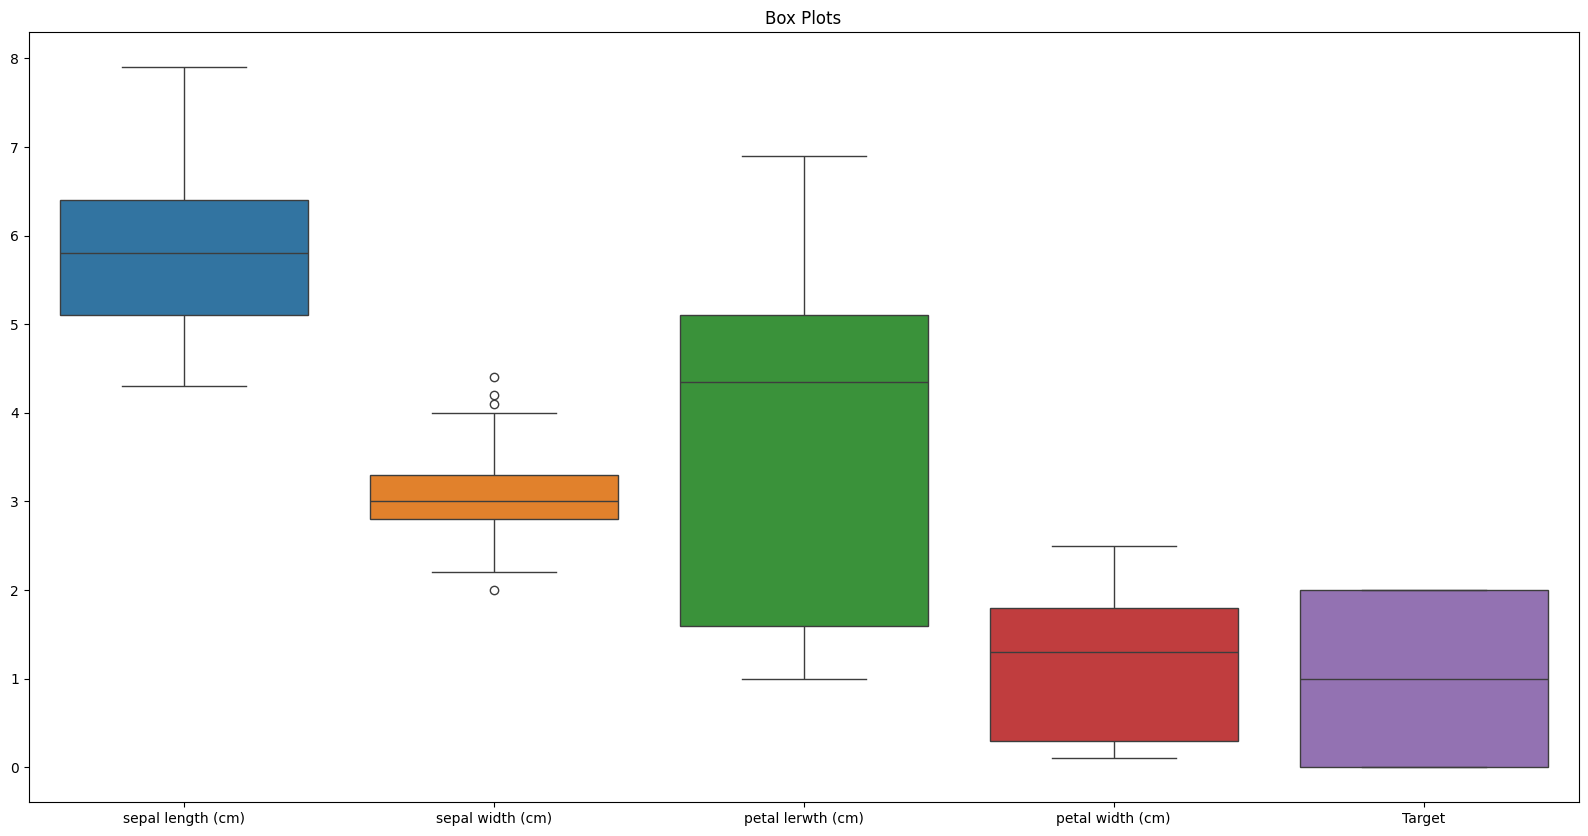

In [85]:
labels = [
    'sepal length (cm)', 'sepal width (cm)', 'petal lerwth (cm)', 'petal width (cm)', 'Target'
]
fig, ax = plt.subplots(figsize=(20, 10))

sns.boxplot(data=df, ax=ax)
ax.set_xticklabels(labels)
ax.set_title('Box Plots')

plt.show()

# Reduce the dimensionality of the dataset

- We want just two classes of the target label.

In [86]:
df['Target'].value_counts()

Target
0    50
1    50
2    50
Name: count, dtype: int64

In [87]:
df=df[df['Target']!=2]
df['Target'].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Examine the separation between classes using a scatter plot

- Sepal length along x-axis, sepal width along y-axis.

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

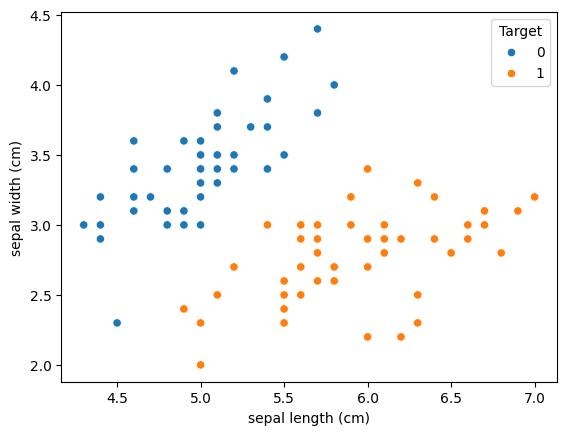

In [88]:
sns.scatterplot(df,x='sepal length (cm)',y='sepal width (cm)',hue='Target')


# Plot a decision boundary for a given model

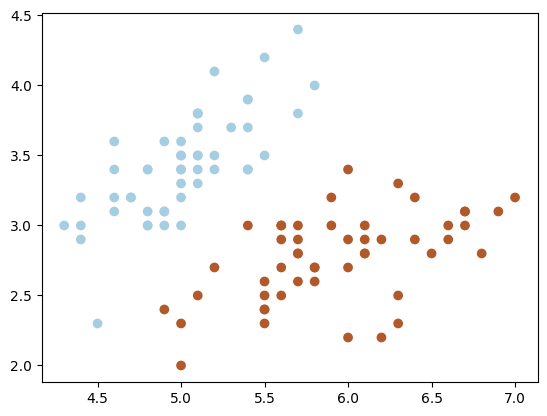

In [89]:
plt.plot()
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'], c=df['Target'], cmap=plt.cm.Paired)
plt.show()

# Train a basic logistic regression model and plot its decision boundary

In [90]:
X= df.drop(columns=['Target','petal length (cm)','petal width (cm)'])
y = df.loc[:,["Target"]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [91]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel

LogisticRegression()

In [92]:
logmodel.fit(X_train, y_train)
pred = logmodel.predict(X_test) 

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [93]:
from sklearn.metrics import accuracy_score
print('accuracy: ', accuracy_score(y_test,pred))

accuracy:  1.0


(1.5, 5.0)

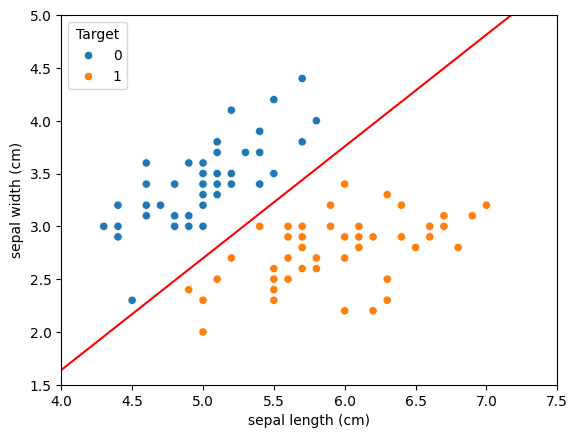

In [94]:
sns.scatterplot(df,x='sepal length (cm)',y='sepal width (cm)',hue='Target')

w = logmodel.coef_[0]           # w consists of 2 elements
b = logmodel.intercept_[0]      # b consists of 1 element
x_points = np.linspace(-1, 10)    # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r')
plt.xlim(4,7.5)
plt.ylim(1.5,5)

# Train an SVM model and plot its decision boundary plus margins

- Make the C parameter = 100.

In [95]:
from sklearn import svm
clf=svm.SVC(kernel='linear', C=100)

In [96]:
clf.fit(X_train, y_train)

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100, kernel='linear')

C:\Users\Admin\AppData\Local\Temp\ipykernel_26504\3692939651.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x_points, yy_down, "k--",c='g')
C:\Users\Admin\AppData\Local\Temp\ipykernel_26504\3692939651.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x_points, yy_up, "k--",c='g')


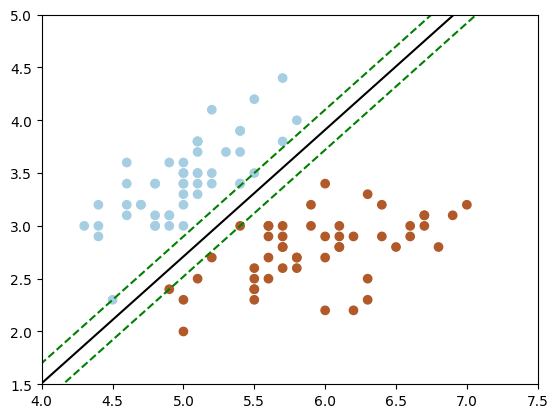

In [97]:
plt.scatter(df["sepal length (cm)"], df["sepal width (cm)"], c=df["Target"], cmap=plt.cm.Paired)

w = clf.coef_[0]
a = -w[0] / w[1]
x_points = np.linspace(-5, 10)
y_points = a * x_points - (clf.intercept_[0]) / w[1]
plt.plot(x_points, y_points, 'k-')
plt.xlim([4,7.5])
plt.ylim([1.5,5])
margin = 1 / np.sqrt(np.sum(clf.coef_**2))
yy_down = y_points - np.sqrt(1 + a**2) * margin
yy_up = y_points + np.sqrt(1 + a**2) * margin
plt.plot(x_points, yy_down, "k--",c='g')
plt.plot(x_points, yy_up, "k--",c='g')

# Reduce the regularization penalty to soften the margin

- Make the C parameter = 0.1

In [98]:
from sklearn import svm
clf=svm.SVC(kernel='linear', C=0.1)

In [99]:
clf.fit(X_train, y_train)

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.1, kernel='linear')

C:\Users\Admin\AppData\Local\Temp\ipykernel_26504\2147239068.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x_points, yy_down, "k--",c='r')
C:\Users\Admin\AppData\Local\Temp\ipykernel_26504\2147239068.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x_points, yy_up, "k--",c='r')


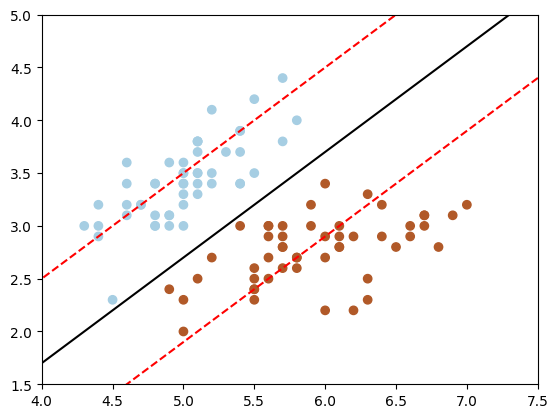

In [100]:
plt.scatter(df["sepal length (cm)"], df["sepal width (cm)"], c=df["Target"], cmap=plt.cm.Paired)
w = clf.coef_[0]
a = -w[0] / w[1]
x_points = np.linspace(-5, 10)
y_points = a * x_points - (clf.intercept_[0]) / w[1]
plt.plot(x_points, y_points, 'k-')
plt.xlim([4,7.5])
plt.ylim([1.5,5])
margin = 1 / np.sqrt(np.sum(clf.coef_**2))
yy_down = y_points - np.sqrt(1 + a**2) * margin
yy_up = y_points + np.sqrt(1 + a**2) * margin
plt.plot(x_points, yy_down, "k--",c='r')
plt.plot(x_points, yy_up, "k--",c='r')

# Split the datasets

In [101]:
X= df.drop(columns=['Target'])
y = df.loc[:,["Target"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Evaluate an SVM model using a holdout test set

In [102]:
from sklearn.metrics import \
     accuracy_score, precision_score, recall_score, f1_score,roc_auc_score

In [103]:
eva=svm.SVC()

In [104]:
eva.fit(X_train, y_train)

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [105]:
pred=eva.predict(X_test)

In [106]:
print('accuracy: ', accuracy_score(y_test,pred))
print('Recall: ', recall_score(y_test,pred))
print('Precision: ', precision_score(y_test,pred))
print('F1 score: ', f1_score(y_test,pred))
print('AUC-ROC: ', roc_auc_score(y_test,pred))

accuracy:  1.0
Recall:  1.0
Precision:  1.0
F1 score:  1.0
AUC-ROC:  1.0
